In [ ]:
from google.colab import files
uploaded = files.upload()




Saving luxury_cosmetics_fraud_analysis_2025.csv to luxury_cosmetics_fraud_analysis_2025 (1).csv


In [ ]:
import pandas as pd



In [ ]:
df = pd.read_csv("luxury_cosmetics_fraud_analysis_2025.csv")


In [ ]:
df.head()


,Transaction_ID,Customer_ID,Transaction_Date,Transaction_Time,Customer_Age,Customer_Loyalty_Tier,Location,Store_ID,Product_SKU,Product_Category,Purchase_Amount,Payment_Method,Device_Type,IP_Address,Fraud_Flag,Footfall_Count
0,702bdd9b-9c93-41e3-9dbb-a849b2422080,119dca0b-8554-4b2d-9bec-e964eaf6af97,2025-07-27,04:04:15,56.0,Silver,San Francisco,FLAGSHIP-LA,NEBULA-SERUM-07,Concealer,158.24,Mobile Payment,Desktop,239.249.58.237,0,333
1,2e64c346-36bc-4acf-bc2b-8b0fdf46abc5,299df086-26c4-4708-b6d7-fcaeceb14637,2025-03-14,20:23:23,46.0,Platinum,Zurich,BOUTIQUE-SHANGHAI,STELLAR-FOUND-03,Lipstick,86.03,Credit Card,Tablet,84.49.227.90,0,406
2,29ad1278-70ce-421f-8d81-23816b39f4ac,dfa3d24d-b935-49a5-aa1d-7d57a44d8773,2025-02-20,12:36:02,32.0,Silver,Milan,POPUP-TOKYO,SOLAR-BLUSH-04,Mascara,255.69,Gift Card,Desktop,79.207.35.55,0,96
3,07dc4894-e0eb-48f1-99a7-1942b1973d9b,7a67e184-9369-49ee-aeac-18f5b51b230f,2025-04-25,19:09:43,60.0,Bronze,London,BOUTIQUE-NYC,GALAXIA-SET-08,Serum,282.76,Gift Card,Mobile,176.194.167.253,0,186
4,ae407054-5543-429c-918a-cdcc42ea9782,cf14730a-8f5a-453d-b527-39a278852b27,2025-04-17,14:23:23,NaN,Platinum,Miami,BOUTIQUE-NYC,LUNAR-MASC-02,Serum,205.86,Gift Card,Mobile,166.31.46.111,0,179


In [ ]:
import matplotlib.pyplot as plt



In [ ]:
import seaborn as sns


In [ ]:
sns.set(style="whitegrid")


In [ ]:
df["Transaction_Date"] = pd.to_datetime(df["Transaction_Date"])
df["Customer_Age"].fillna(df["Customer_Age"].median(), inplace=True)


/tmp/ipython-input-1630701826.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Customer_Age"].fillna(df["Customer_Age"].median(), inplace=True)


In [ ]:
df["Customer_Age"].fillna(df["Customer_Age"].median(), inplace=True)


/tmp/ipython-input-547931938.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Customer_Age"].fillna(df["Customer_Age"].median(), inplace=True)


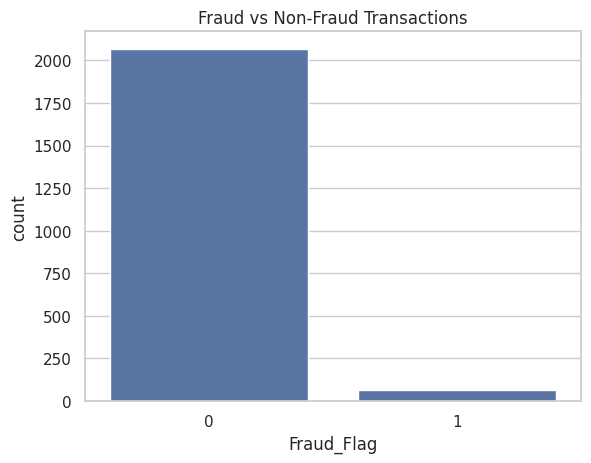

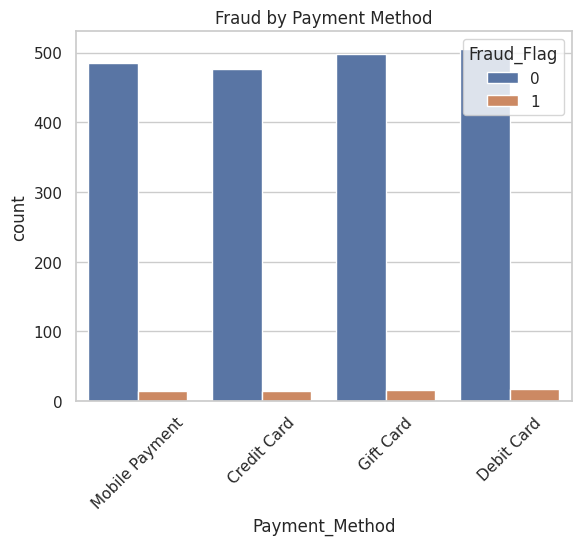

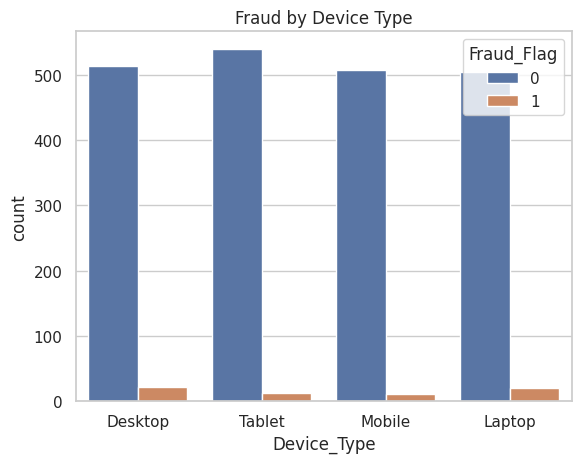

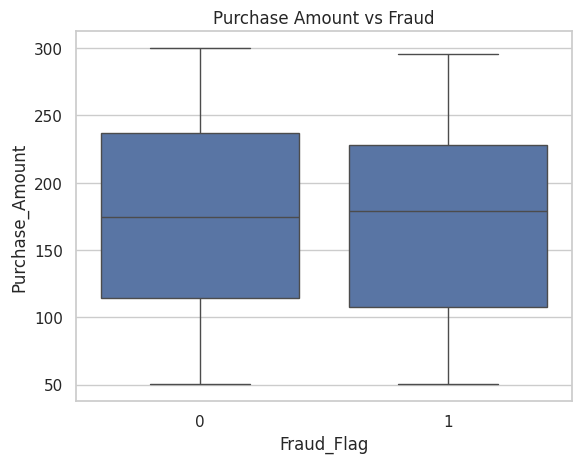

In [ ]:
sns.countplot(x="Fraud_Flag", data=df)
plt.title("Fraud vs Non-Fraud Transactions")
plt.show()

sns.countplot(x="Payment_Method", hue="Fraud_Flag", data=df)
plt.xticks(rotation=45)
plt.title("Fraud by Payment Method")
plt.show()

sns.countplot(x="Device_Type", hue="Fraud_Flag", data=df)
plt.title("Fraud by Device Type")
plt.show()

sns.boxplot(x="Fraud_Flag", y="Purchase_Amount", data=df)
plt.title("Purchase Amount vs Fraud")
plt.show()


In [ ]:
fraud_by_location = df.groupby("Location")["Fraud_Flag"].mean().sort_values(ascending=False)
print("Fraud Rate by Location:\n", fraud_by_location.head())

fraud_by_loyalty = df.groupby("Customer_Loyalty_Tier")["Fraud_Flag"].mean().sort_values(ascending=False)
print("\nFraud Rate by Loyalty Tier:\n", fraud_by_loyalty)


Fraud Rate by Location:
 Location
Las Vegas    0.078431
Shanghai     0.051282
Miami        0.047619
Sydney       0.046875
Singapore    0.044643
Name: Fraud_Flag, dtype: float64

Fraud Rate by Loyalty Tier:
 Customer_Loyalty_Tier
VIP         0.054054
Platinum    0.039106
Silver      0.031621
Bronze      0.029703
Gold        0.026005
Name: Fraud_Flag, dtype: float64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X = df[["Customer_Age", "Purchase_Amount", "Footfall_Count"]]
y = df["Fraud_Flag"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      1.00      0.98       620
           1       0.00      0.00      0.00        20

    accuracy                           0.97       640
   macro avg       0.48      0.50      0.49       640
weighted avg       0.94      0.97      0.95       640



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


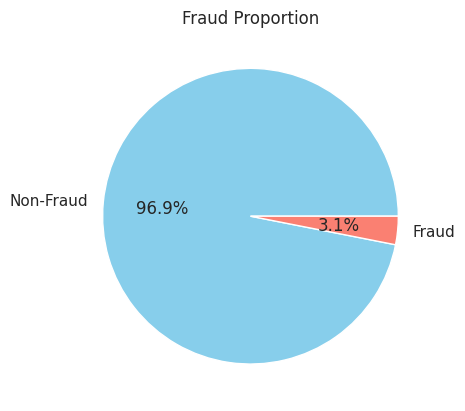

In [ ]:
fraud_counts = df["Fraud_Flag"].value_counts()
fraud_counts.plot.pie(autopct='%1.1f%%', labels=["Non-Fraud", "Fraud"], colors=["skyblue", "salmon"])
plt.title("Fraud Proportion")
plt.ylabel("")
plt.show()


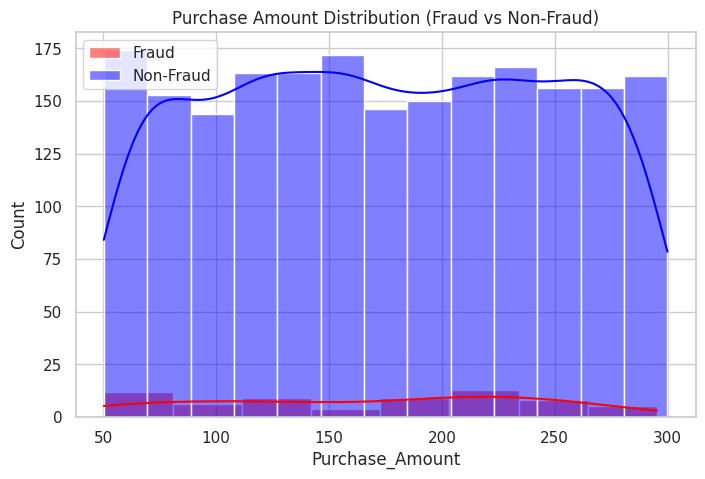

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df[df["Fraud_Flag"]==1]["Purchase_Amount"], color="red", kde=True, label="Fraud")
sns.histplot(df[df["Fraud_Flag"]==0]["Purchase_Amount"], color="blue", kde=True, label="Non-Fraud")
plt.legend()
plt.title("Purchase Amount Distribution (Fraud vs Non-Fraud)")
plt.show()


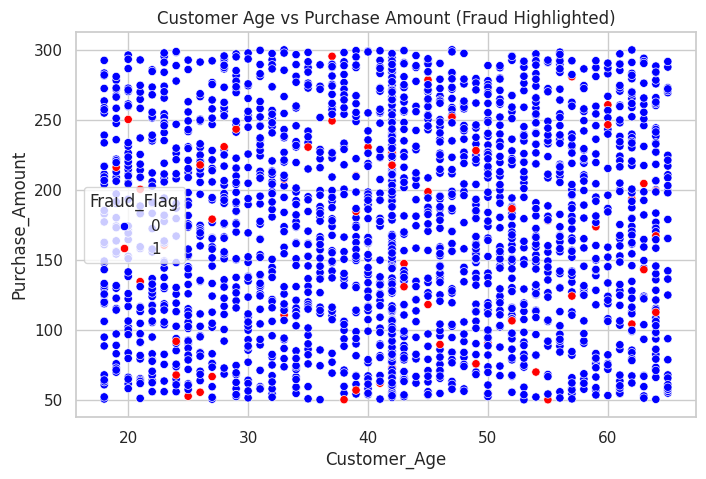

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="Customer_Age", y="Purchase_Amount", hue="Fraud_Flag", data=df, palette={0:"blue",1:"red"})
plt.title("Customer Age vs Purchase Amount (Fraud Highlighted)")
plt.show()


/tmp/ipython-input-543108608.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Fraud_Flag", y="Purchase_Amount", data=df, palette={0:"skyblue",1:"salmon"})


ValueError: The palette dictionary is missing keys: {'0', '1'}

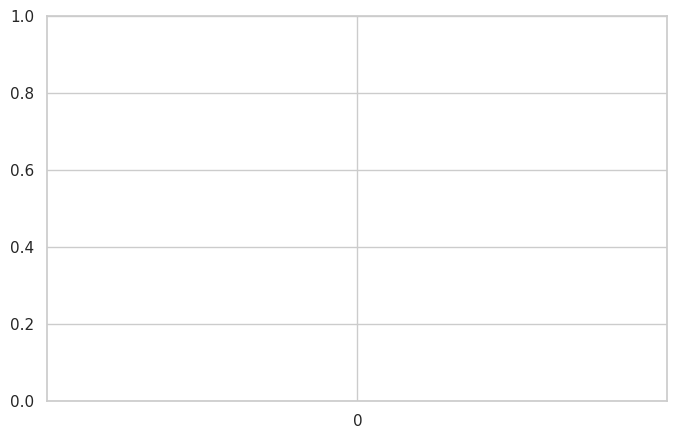

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.boxplot(x="Fraud_Flag", y="Purchase_Amount", data=df, palette={'0':"skyblue",'1':"salmon"})
plt.xticks([0,1], ["Non-Fraud", "Fraud"])
plt.title("Purchase Amount Distribution by Fraud Flag")
plt.show()

/tmp/ipython-input-1367855427.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Fraud_Flag", y="Purchase_Amount", data=df, palette=["skyblue","salmon"])


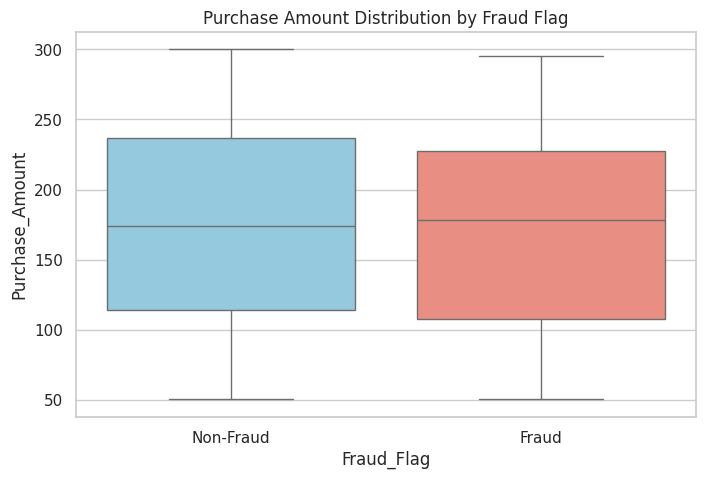

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Fraud_Flag", y="Purchase_Amount", data=df, palette=["skyblue","salmon"])
plt.xticks([0,1], ["Non-Fraud", "Fraud"])
plt.title("Purchase Amount Distribution by Fraud Flag")
plt.show()


In [ ]:
# Step 1: Import the necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import load_iris

# Step 2: Load and prepare the dataset
# Using the Iris dataset for example
data = load_iris()
X = data.data  # Features
y = data.target  # Target variable (labels)

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Create and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = dt_model.predict(X_test)

# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Decision Tree Accuracy: 100.00%
Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [ ]:
# Step 1: Import the necessary libraries
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import load_iris

# Step 2: Load and prepare the dataset
data = load_iris()
X = data.data  # Features
y = data.target  # Target variable (labels)

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Create and train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = nb_model.predict(X_test)

# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Naive Bayes Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Naive Bayes Accuracy: 97.78%
Confusion Matrix:
 [[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]


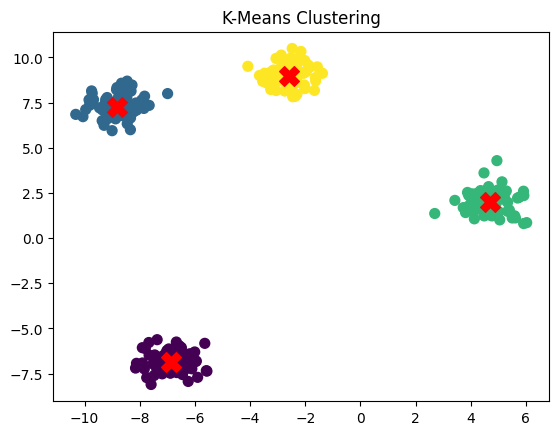

In [ ]:
# Step 1: Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Step 2: Generate synthetic data
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)

# Step 3: Create and fit the K-Means model
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

# Step 4: Predict cluster labels
y_kmeans = kmeans.predict(X)

# Step 5: Plot the results
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X')  # Plot centroids
plt.title("K-Means Clustering")
plt.show()
